In [34]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, numpy as np
import folium
from folium import plugins

radios = gpd.read_file('/Users/luisavicentin/2do cuatri 2021/MetOP/TP geo/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp')
radios


,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
0,1760908.00,7579.745,2,1,02,013,03,02,U,020130302,312.0,342.0,654.0,270.0,377.0,265.0,"POLYGON ((4192267.085 6152975.831, 4192240.425..."
1,2240206.00,14184.670,3,2,02,013,11,01,U,020131101,296.0,272.0,568.0,172.0,217.0,170.0,"POLYGON ((4193005.531 6152773.045, 4193022.852..."
2,28001.00,720.460,4,3,02,013,01,04,U,020130104,379.0,384.0,763.0,367.0,524.0,355.0,"POLYGON ((4192119.600 6153045.088, 4192222.042..."
3,68016.38,1084.790,5,4,02,013,01,03,U,020130103,286.0,326.0,612.0,258.0,314.0,254.0,"POLYGON ((4192119.600 6153045.088, 4192124.424..."
4,53839.88,948.102,6,5,02,013,01,02,U,020130102,373.0,397.0,770.0,343.0,408.0,340.0,"POLYGON ((4191961.799 6152874.180, 4191960.076..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,91488.00,1209.676,3552,3537,02,008,12,02,U,020081202,461.0,543.0,1004.0,356.0,378.0,330.0,"POLYGON ((4190496.745 6136003.489, 4190585.718..."
3551,120426.10,1403.462,3553,3538,02,008,09,07,U,020080907,330.0,442.0,772.0,260.0,297.0,243.0,"POLYGON ((4190063.362 6136008.824, 4190168.025..."
3552,91443.13,1210.355,3554,3539,02,008,12,05,U,020081205,475.0,503.0,978.0,341.0,397.0,314.0,"POLYGON ((4190699.346 6135786.829, 4190801.651..."
3553,118110.30,1390.708,3555,3540,02,008,12,01,U,020081201,427.0,488.0,915.0,306.0,354.0,293.0,"POLYGON ((4190269.797 6135788.912, 4190371.127..."


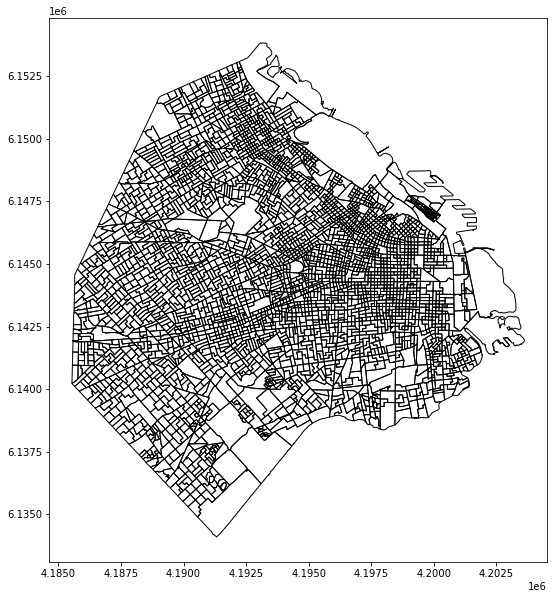

In [2]:
radios.plot(figsize=(10, 10), color='None', edgecolor='black')
plt.show()

# Chequeamos que radios tiene la geometria de los radios censales

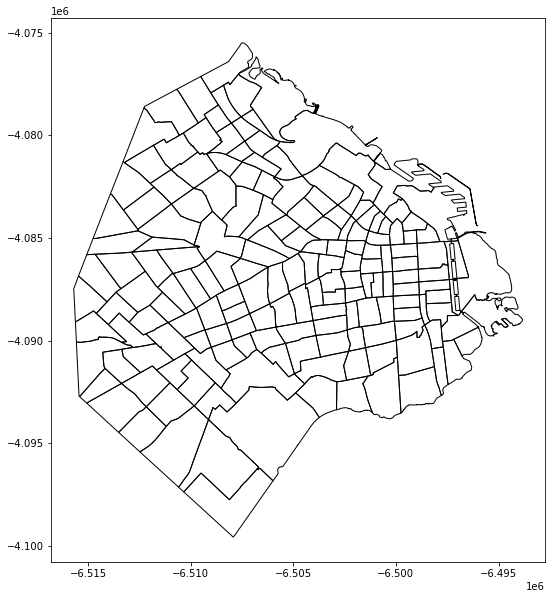

In [3]:
caba_shape = gpd.read_file('/Users/luisavicentin/2do cuatri 2021/MetOP/TP geo/elecciones_2019/CABA.shp')

caba_shape.crs
caba_shape.plot( figsize=(10, 10), color='None', edgecolor='black')
plt.show()

# Chequeamos que caba_shape tiene la geometria de los circuitos

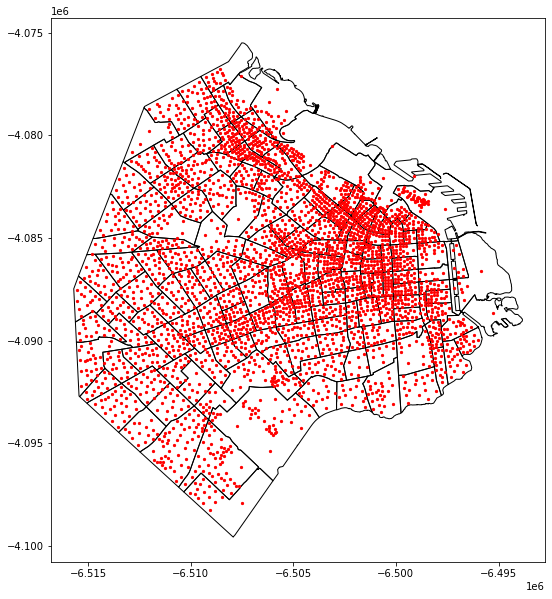

In [4]:
radios.to_crs(caba_shape.crs, inplace=True) # para que se complementen bien los mapas

# calculo el centroide de cada radio
aux = radios.centroid
# ploteo mi mapa base
base = caba_shape.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()

# Chequeamos que los centroides de los radios censales mas o menos coincidian con la ubicacion de los circuitos

In [5]:
caba_shape

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,0149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,0101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,0102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


In [6]:
elecciones_raw = pd.read_csv('/Users/luisavicentin/2do cuatri 2021/MetOP/TP elecciones 2019/datos_agrup.csv')
elecciones_raw

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO
...,...,...,...,...,...,...,...,...,...,...
616673,1,1015,1015000167,0101507413X,901015000000,87,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616674,1,1015,1015000167,0101507413X,901015000000,VB,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO
616675,1,1015,1015000167,0101507413X,901015000000,VII,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO
616676,1,1015,1015000167,0101507413X,901015000000,VN,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO


In [7]:
# Ordenamos elecciones_raw para despues mergear correctamente

elecciones = elecciones_raw[['CODIGO_CIRCUITO', 'CODIGO_MESA','CODIGO_SECCION', "VOTOS_AGRUPACION", "NOMBRE_CATEGORIA", "NOMBRE_AGRUPACION"]] # seleccionamos columnas que nos sirven

# A diferencia de la primera parte del TP, aca el codigo_seccion es mas util que nombre_region porque al estar en numeros como en otras tablas permite un merge mas facil

elecciones = elecciones[elecciones["NOMBRE_CATEGORIA"]== 'Presidente y Vicepresidente de la República'] # seleccionamos solo categoria presidencial para analizar
elecciones = elecciones.rename(columns={'CODIGO_SECCION': 'COMUNAS'}) # renombramos columna para futuro merge

elecciones['COMUNAS'] = elecciones['COMUNAS'].apply(str) # convertimos a string para poder hacer slicing
elecciones['COMUNAS'] = elecciones['COMUNAS'].str[-2:] # seleccionamos ultimos dos digitos que son los de la comuna para mas facil visualizacion y mergeo posterior
elecciones['COMUNAS'] = elecciones['COMUNAS'].apply(int)

elecciones['CODIGO_CIRCUITO'] = elecciones['CODIGO_CIRCUITO'].apply(str) # convertimos a string para poder hacer slicing
elecciones['CODIGO_CIRCUITO'] = elecciones['CODIGO_CIRCUITO'].str[-3:] # seleccionamos ultimos 3 digitos que son los del circuito
elecciones['CODIGO_CIRCUITO'] = elecciones['CODIGO_CIRCUITO'].apply(int)

# Ordenamos caba_shape para despues mergear correctamente

caba_shape = caba_shape.rename(columns={'circuito': "CODIGO_CIRCUITO", 'departamen': 'COMUNAS'}) # renombramos columnas para futuro merge

caba_shape = caba_shape[['CODIGO_CIRCUITO', 'COMUNAS', 'geometry']] # seleccionamos columnas que nos sirven

caba_shape['CODIGO_CIRCUITO'] = caba_shape['CODIGO_CIRCUITO'].apply(str) # convertimos a string para poder hacer slicing
caba_shape['CODIGO_CIRCUITO'] = caba_shape['CODIGO_CIRCUITO'].str[-3:] # seleccionamos ultimos 3 digitos que son los del circuito
caba_shape['CODIGO_CIRCUITO'] = caba_shape['CODIGO_CIRCUITO'].apply(int)

Votos_por_comuna= elecciones.groupby(['NOMBRE_AGRUPACION','COMUNAS'])[['VOTOS_AGRUPACION']].sum()  # Agrupamos los votos por comuna
Votos_por_circuito= elecciones.groupby(['NOMBRE_AGRUPACION','COMUNAS','CODIGO_CIRCUITO'])[['VOTOS_AGRUPACION']].sum()  # Agrupamos los votos por circuito
TablaComuna = Votos_por_comuna.drop(["RECURRIDO","IMPUGNADO", "NULO", "BLANCO"]) # Eliminamos las categorías que no nos sirven para calcular los %
TablaCircuito = Votos_por_circuito.drop(["RECURRIDO","IMPUGNADO", "NULO", "BLANCO"])

# Pivoteamos tablas para que queden mejor ordenadas

Tabla_Comunas = pd.pivot_table(TablaComuna, values=None, index="NOMBRE_AGRUPACION", columns='COMUNAS', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) #Pivoteo las tablas para que queden más ordenadas
Tabla_Circuito= pd.pivot_table(TablaCircuito, values=None, index="NOMBRE_AGRUPACION", columns='CODIGO_CIRCUITO', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
 
Porcentaje_JxC_Comunas = Tabla_Comunas/Tabla_Comunas[Tabla_Comunas.columns].sum()*100 # Calculamos porcentaje de los partidos por comuna
Porcentaje_JxC_Comunas = Porcentaje_JxC_Comunas.round(2) # Redondeamos
Porcentaje_JxC_Comunas = Porcentaje_JxC_Comunas.drop(["CONSENSO FEDERAL",'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD','FRENTE DE TODOS','FRENTE NOS','FRENTE PATRIOTA','MOVIMIENTO AL SOCIALISMO',
                                                        'MOVIMIENTO DE ACCION VECINAL','PARTIDO AUTONOMISTA','UNITE POR LA LIBERTAD Y LA DIGNIDAD']) #Elimino los partidos que no me interesan

Porcentaje_JxC_Circuito = Tabla_Circuito/Tabla_Circuito[Tabla_Circuito.columns].sum()*100 # Calculamos porcentaje de los partidos por circuito
Porcentaje_JxC_Circuito = Porcentaje_JxC_Circuito.round(2) # Redondeamos
Porcentaje_JxC_Circuito = Porcentaje_JxC_Circuito.drop(["CONSENSO FEDERAL",'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD','FRENTE DE TODOS','FRENTE NOS','FRENTE PATRIOTA','MOVIMIENTO AL SOCIALISMO',
                                        'MOVIMIENTO DE ACCION VECINAL','PARTIDO AUTONOMISTA','UNITE POR LA LIBERTAD Y LA DIGNIDAD']) #Elimino los partidos que no me interesan


Porcentaje_JxC_Circuito = Porcentaje_JxC_Circuito.transpose() # Invertimos filas x columnas
Caba_Shape_= pd.merge(caba_shape, Porcentaje_JxC_Circuito, on="CODIGO_CIRCUITO", how="inner") # Hacemos merge para tener la geometría 
#Caba_Shape_= Caba_Shape_.drop(['COMUNAS'], axis=1)

Caba_Shape_['COMUNAS'] = Caba_Shape_['COMUNAS'].apply(str) # convertimos a string para poder hacer slicing
Caba_Shape_['COMUNAS'] = Caba_Shape_['COMUNAS'].str[-2:] # seleccionamos ultimos 3 digitos que son los del circuito
Caba_Shape_['COMUNAS'] = Caba_Shape_['COMUNAS'].apply(int)

Caba_Shape_= Caba_Shape_.set_geometry('geometry')  
Caba_Shape_ = Caba_Shape_.sort_values(by= 'CODIGO_CIRCUITO') # Ordenamos por circuito

# !!! Quizas la tabla comunas no sea necesaria. Vamos a analizar por circuitos. 
# Pero si conseguimos geometria de las comunas podriamos plotear como le fue a caba por comunas y por circuitos y comparar el primer informe con el segundo. 

Caba_Shape_ # Geometria de los circuitos y como le fue a JxC en cada circuito

,CODIGO_CIRCUITO,COMUNAS,geometry,JUNTOS POR EL CAMBIO
7,1,1,"POLYGON Z ((-6497294.216 -4088142.493 0.000, -...",38.37
8,2,1,"POLYGON Z ((-6498537.655 -4087740.684 0.000, -...",35.84
0,3,1,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",74.24
5,5,1,MULTIPOLYGON Z (((-6497185.903 -4082052.692 0....,17.64
16,6,1,"POLYGON Z ((-6499644.727 -4084669.159 0.000, -...",77.99
...,...,...,...,...
160,163,15,"POLYGON Z ((-6505348.070 -4083866.211 0.000, -...",36.20
156,164,15,"POLYGON Z ((-6507652.050 -4084945.661 0.000, -...",39.55
151,165,15,"POLYGON Z ((-6508638.340 -4081745.040 0.000, -...",44.13
152,166,15,"POLYGON Z ((-6508941.686 -4083702.129 0.000, -...",40.99


In [8]:
Porcentaje_JxC_Comunas = Porcentaje_JxC_Comunas.transpose() # Invertimos filas x columnas


#Porcentaje_JxC_Comunas = Porcentaje_JxC_Comunas.stack() # Reordenamos la tabla para poder hacer mas adelante un append manual a la variable felicidad2 y poder graficar por comuna

Porcentaje_JxC_Comunas

NOMBRE_AGRUPACION         JUNTOS POR EL CAMBIO
                 COMUNAS                      
VOTOS_AGRUPACION 1                       46.53
                 2                       64.88
                 3                       41.51
                 4                       36.41
                 5                       41.47
                 6                       47.76
                 7                       41.58
                 8                       31.23
                 9                       38.12
                 10                      41.56
                 11                      45.61
                 12                      47.35
                 13                      59.90
                 14                      60.11
                 15                      41.06

In [9]:
radios_censales = radios[['VARONES', 'MUJERES', 'TOT_POB', 'geometry']]  # recortamos a columnas que nos sirven

radios_censales

,VARONES,MUJERES,TOT_POB,geometry
0,312.0,342.0,654.0,"POLYGON ((-6508495.397 -4076757.869, -6508533...."
1,296.0,272.0,568.0,"POLYGON ((-6507589.408 -4076935.049, -6507567...."
2,379.0,384.0,763.0,"POLYGON ((-6508678.933 -4076687.905, -6508559...."
3,286.0,326.0,612.0,"POLYGON ((-6508678.933 -4076687.905, -6508671...."
4,373.0,397.0,770.0,"POLYGON ((-6508853.232 -4076907.578, -6508854...."
...,...,...,...,...
3550,461.0,543.0,1004.0,"POLYGON ((-6509092.003 -4097339.498, -6508976...."
3551,330.0,442.0,772.0,"POLYGON ((-6509614.432 -4097372.317, -6509478...."
3552,475.0,503.0,978.0,"POLYGON ((-6508828.370 -4097582.078, -6508695...."
3553,427.0,488.0,915.0,"POLYGON ((-6509345.896 -4097618.481, -6509214...."


In [10]:
import geopandas as gpd 

felicidad = gpd.sjoin(radios_censales, Caba_Shape_, how="right", predicate='intersects') # Spatial Join de ambas geometrias
felicidad['TOT_POB'] = felicidad.groupby(['CODIGO_CIRCUITO'])['TOT_POB'].transform('sum') # Calculamos y agrupamos el total de la poblacion por circuito para despues poder calcular porcentaje
felicidad['VARONES'] = felicidad.groupby(['CODIGO_CIRCUITO'])['VARONES'].transform('sum') # Calculamos y agrupamos el total de los varones por circuito para despues poder calcular porcentaje
felicidad['MUJERES'] = felicidad.groupby(['CODIGO_CIRCUITO'])['MUJERES'].transform('sum') # Calculamos y agrupamos el total de las mujeres por circuito para despues poder calcular porcentaje
felicidad['%VARONES'] = (felicidad['VARONES']/felicidad['TOT_POB'])*100 # Calculamos el porcentaje de varones en la poblacion para despues graficar correlacion con % votos
felicidad['%VARONES'] = felicidad['%VARONES'].round(2) # Redondeamos 
felicidad['%MUJERES'] = (felicidad['MUJERES']/felicidad['TOT_POB'])*100 # Calculamos el porcentaje de mujeres en la poblacion para despues graficar correlacion con % votos
felicidad['%MUJERES'] = felicidad['%MUJERES'].round(2) # Redondeamos
#
#  Renombramos para visualizar mas prolijo despues
felicidad = felicidad.rename(columns={'JUNTOS POR EL CAMBIO': '% Votos de JxC', 'CODIGO_CIRCUITO' : 'Circuito', '%VARONES': '% Varones', '%MUJERES': '% Mujeres'}) 


felicidad1 = felicidad[['Circuito', '% Varones', '% Mujeres', '% Votos de JxC', 'geometry']] # Recortamos a columnas que nos sirven

felicidad1 = felicidad1.dissolve(by= 'Circuito') # Ordenamos y agrupamos por circuito para mas prolijidad

felicidad1

,geometry,% Varones,% Mujeres,% Votos de JxC
Circuito,,,,
1,"POLYGON Z ((-6497215.291 -4088619.054 0.000, -...",46.78,53.22,38.37
2,"POLYGON Z ((-6498066.328 -4087549.480 0.000, -...",48.09,51.91,35.84
3,"POLYGON Z ((-6496257.387 -4084750.332 0.000, -...",54.03,45.97,74.24
5,MULTIPOLYGON Z (((-6498813.171 -4082720.648 0....,50.96,49.04,17.64
6,"POLYGON Z ((-6499715.749 -4084266.533 0.000, -...",43.76,56.24,77.99
...,...,...,...,...
163,"POLYGON Z ((-6505372.561 -4083880.479 0.000, -...",47.38,52.62,36.20
164,"POLYGON Z ((-6508347.240 -4084936.372 0.000, -...",46.91,53.09,39.55
165,"POLYGON Z ((-6507763.035 -4082470.311 0.000, -...",46.90,53.10,44.13


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion lineal varones por circuito

ax = sns.lmplot(x="% Varones", y="% Votos de JxC", data=felicidad1, height=9)
plt.title("Relación % votos de JxC y % varones por circuito")

ModuleNotFoundError: No module named 'seaborn'

Text(0.5, 1.0, 'Relación % votos de JxC y % mujeres por circuito')

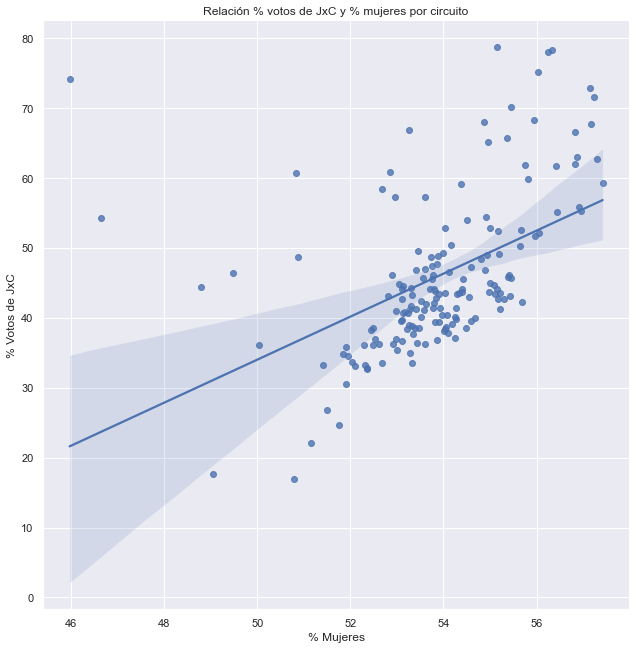

In [ ]:
# Regresion lineal mujeres por circuito

sns.lmplot(x="% Mujeres", y="% Votos de JxC", data=felicidad1, height=9)
plt.title("Relación % votos de JxC y % mujeres por circuito")

Text(0.5, 1.0, 'Relación % votos de JxC y % varones por circuito')

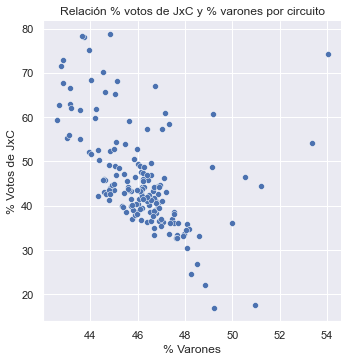

In [ ]:
# Relplot varones

sns.set(style = 'darkgrid')

sns.relplot(x = '% Varones', y = '% Votos de JxC', data= felicidad1)
plt.title("Relación % votos de JxC y % varones por circuito")

Text(0.5, 1.0, 'Relación % votos de JxC y % mujeres por circuito')

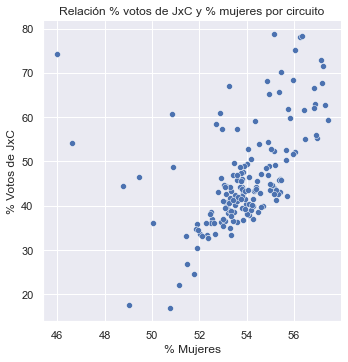

In [ ]:
# Relplot mujeres

sns.set(style = 'darkgrid')

sns.relplot(x = '% Mujeres', y = '% Votos de JxC', data= felicidad1)
plt.title("Relación % votos de JxC y % mujeres por circuito")

Text(0.5, 1.0, 'Relación % votos de JxC y % varones por circuito')

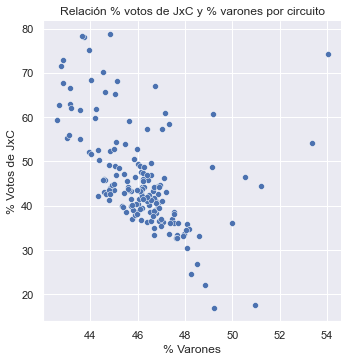

In [ ]:
sns.relplot(x='% Varones' , y='% Votos de JxC', data= felicidad1)
plt.title("Relación % votos de JxC y % varones por circuito")

In [53]:
#Armo un primer mapa: minteractivo_circuitos para poder observar más fácilmente las diferencias entre circuitos situandome con el mouse
#En cada uno de ellos

minteractivo_circuitos = felicidad1.explore(
     column="% Votos de JxC",  # hago mapa tipo choropleth basado en la columna % Votos de JxC
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, 
     k=10,
     tiles= "CartoDB positron",
     cmap='BuPu', 
     legend_kwds=dict(colorbar=False) 
)
minteractivo_circuitos

Text(0.5, 1.0, '% JxC por Circuito')

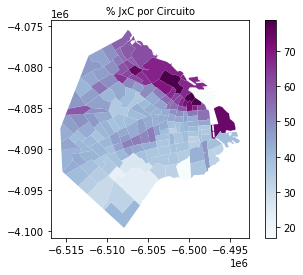

In [59]:

#Ver colores para mapas https://matplotlib.org/2.0.2/users/colormaps.html 

#Segundo mapa: Mapa_JxC_Circuitos: circuitos electorales y porcentaje de votos de JxC en cada uno de ellos

felicidad1.set_geometry('geometry')
fig, ax = plt.subplots(1, 1)
Mapa_JxC_Circuitos = felicidad1.plot(column='% Votos de JxC', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Juntos Por El Cambio", 'orientation': "horizontal"})
plt.title("% JxC por Circuito", fontsize=10, color="Black")

Text(0.5, 1.0, '% Varones por Circuito')

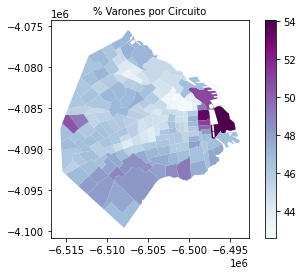

In [14]:
#Tercer mapa: Mapa_JxC_Circuitos: circuitos electorales y porcentaje de varones en cada uno de ellos

felicidad1.set_geometry('geometry')
fig, ax = plt.subplots(1, 1)
Mapa_JxC_Circuitos = felicidad1.plot(column='% Varones', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Varones", 'orientation': "horizontal"})
plt.title("% Varones por Circuito", fontsize=10, color="Black")

Text(0.5, 1.0, '% Mujeres por Circuito')

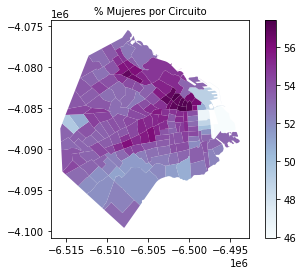

In [15]:
#Cuarto mapa:Mapa_Mujeres_Circuitos: Porcentaje Mujeres por circuito electoral

fig, ax = plt.subplots(1, 1)
Mapa_Mujeres_Circuitos = felicidad1.plot(column='% Mujeres', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Mujeres por Circuito", 'orientation': "horizontal"})
plt.title("% Mujeres por Circuito", fontsize=10, color="Black")

Text(0.5, 1.0, 'Diferencia entre Varones y Mujeres por Circuito')

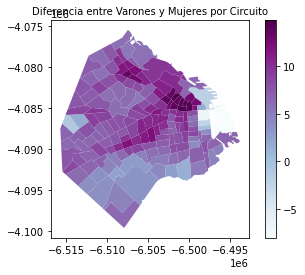

In [16]:
#Calculamos la diferencia entre % de varones y mujeres por circuito y armamos una nueva columna.
felicidad1['Diferencia entre % V y M'] = felicidad1['% Mujeres'] - felicidad1['% Varones']
dif_vym = felicidad1

# #Ahora armamos un quinto mapa para graficar la diferencia. 
fig, ax = plt.subplots(1, 1)
Mapa_Diferencia_VyM = dif_vym.plot(column='Diferencia entre % V y M', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Diferencia entre Varones y Mujeres por Circuito", 'orientation': "horizontal"})
plt.title("Diferencia entre Varones y Mujeres por Circuito", fontsize=10, color="Black")

In [17]:
import geopandas as gpd

# Armo una nueva tabla para poder plotear Comunas
felicidad2 = gpd.sjoin(radios_censales, Caba_Shape_, how="right", predicate='intersects') # Spatial Join de ambas geometrias
felicidad2['TOT_POB'] = felicidad2.groupby(['COMUNAS'])['TOT_POB'].transform('sum') # Calculamos y agrupamos el total de la poblacion por comuna para despues poder calcular porcentaje
felicidad2['VARONES'] = felicidad2.groupby(['COMUNAS'])['VARONES'].transform('sum') # Calculamos y agrupamos el total de los varones por comuna para despues poder calcular porcentaje
felicidad2['MUJERES'] = felicidad2.groupby(['COMUNAS'])['MUJERES'].transform('sum') # Calculamos y agrupamos el total de las mujeres por comuna para despues poder calcular porcentaje
felicidad2['%VARONES'] = (felicidad2['VARONES']/felicidad2['TOT_POB'])*100 # Calculamos el porcentaje de varones en la poblacion para despues graficar correlacion con % votos
felicidad2['%VARONES'] = felicidad2['%VARONES'].round(2) # Redondeamos 
felicidad2['%MUJERES'] = (felicidad2['MUJERES']/felicidad2['TOT_POB'])*100 # Calculamos el porcentaje de mujeres en la poblacion para despues graficar correlacion con % votos
felicidad2['%MUJERES'] = felicidad2['%MUJERES'].round(2) # Redondeamos
# #
# #  Renombramos para visualizar mas prolijo despues
felicidad2 = felicidad2.rename(columns={'JUNTOS POR EL CAMBIO': '% Votos de JxC', '%VARONES': '% Varones', '%MUJERES': '% Mujeres'}) 


felicidad2 = felicidad2[['COMUNAS', '% Varones', '% Mujeres', '% Votos de JxC', 'geometry']] # Recortamos a columnas que nos sirven

felicidad2 = felicidad2.dissolve(by= 'COMUNAS') # Ordenamos y agrupamos por circuito para mas prolijidad

extension = Porcentaje_JxC_Comunas["JUNTOS POR EL CAMBIO"] # De la tabla de Comunas hacemos un append manual para tener el porcentaje de votos por comunas
felicidad2 = felicidad2.join(extension)

felicidad2= felicidad2.drop(['% Votos de JxC'], axis=1) # Dropeamos los votos de JxC por circuito
felicidad2 = felicidad2.reset_index() # Reseteaoms index 
felicidad2 = felicidad2.drop(['level_0'], axis=1) # Dropeamos columna que se sumo cuando hicimos el append manual 

felicidad2

,COMUNAS,geometry,% Varones,% Mujeres,JUNTOS POR EL CAMBIO
0,1,MULTIPOLYGON Z (((-6500163.365 -4086625.552 0....,47.76,52.24,46.53
1,2,"POLYGON Z ((-6502839.597 -4085102.896 0.000, -...",43.20,56.80,64.88
2,3,"POLYGON Z ((-6502626.420 -4086456.447 0.000, -...",45.53,54.47,41.51
3,4,"POLYGON Z ((-6503717.796 -4093736.476 0.000, -...",47.30,52.70,36.41
4,5,"POLYGON Z ((-6502442.965 -4088336.670 0.000, -...",45.25,54.75,41.47
5,6,"POLYGON Z ((-6507360.949 -4088085.264 0.000, -...",44.76,55.24,47.76
6,7,"POLYGON Z ((-6509719.698 -4088406.154 0.000, -...",46.48,53.52,41.58
7,8,"POLYGON Z ((-6512172.623 -4095226.096 0.000, -...",47.86,52.14,31.23
8,9,"POLYGON Z ((-6515446.195 -4092612.119 0.000, -...",47.14,52.86,38.12
9,10,"POLYGON Z ((-6513681.670 -4089920.376 0.000, -...",46.43,53.57,41.56


In [50]:
#Sexto mapa: minteractivo_comunas para tener una primer visión más fácil del mapa y sus valores
minteractivo_comunas = felicidad2.explore(
     column="JUNTOS POR EL CAMBIO",  # hago mapa tipo choropleth basado en la columna JUNTOS POR EL CAMBIO
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, 
     k=10,
     tiles= "CartoDB positron",
     cmap='BuPu', 
     legend_kwds=dict(colorbar=False), 
)
minteractivo_comunas

Text(0.5, 1.0, '% JxC por Comuna')

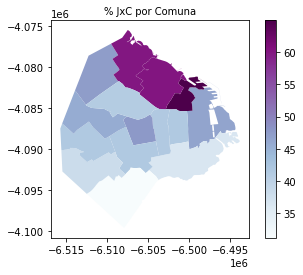

In [18]:
#Septimo mapa: Mapa_JxC_Comunas: Porcentaje de votos de JxC por Comunas

felicidad2.set_geometry('geometry')
fig, ax = plt.subplots(1, 1)
Mapa_JxC_Comunas = felicidad2.plot(column='JUNTOS POR EL CAMBIO', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Juntos Por El Cambio por Comuna", 'orientation': "horizontal"})
plt.title("% JxC por Comuna", fontsize=10, color="Black")

Text(0.5, 1.0, '% Varones por Comuna')

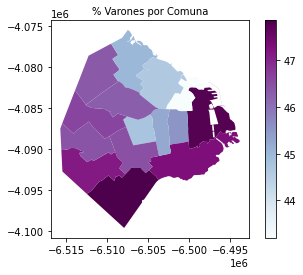

In [20]:
#Octavo mapa: Mapa_Varones_Comunas: Porcentaje de Varones por comunas

felicidad2.set_geometry('geometry')
fig, ax = plt.subplots(1, 1)
Mapa_Varones_Comunas = felicidad2.plot(column='% Varones', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Varones por Comuna", 'orientation': "horizontal"})
plt.title("% Varones por Comuna", fontsize=10, color="Black")

Text(0.5, 1.0, '% Mujeres por Comuna')

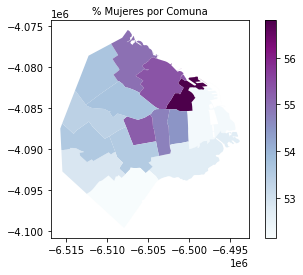

In [21]:
#Noveno mapa: Mapa_Mujeres_Comunas: Porcentaje de Mujeres por comunas


fig, ax = plt.subplots(1, 1)
Mapa_Mujeres_Comunas = felicidad2.plot(column='% Mujeres', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Porcentajes Mujeres por Comuna", 'orientation': "horizontal"})
plt.title("% Mujeres por Comuna", fontsize=10, color="Black")

Text(0.5, 1.0, 'Diferencia entre Varones y Mujeres por Comuna')

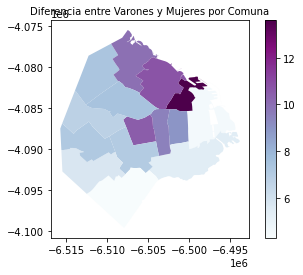

In [22]:
#Calculamos la diferencia entre % de varones y mujeres por comuna y armamos una nueva columna.
felicidad2['Diferencia entre % V y M'] = felicidad2['% Mujeres'] - felicidad2['% Varones']
dif_vym_comuna = felicidad2

# #Ahora armamos un décimo mapa para graficar la diferencia. 
fig, ax = plt.subplots(1, 1)
Mapa_Diferencia_VyM = dif_vym_comuna.plot(column='Diferencia entre % V y M', 
                ax=ax, 
                figsize=(30, 30),
                cmap='BuPu', 
                legend={'label': "Diferencia entre Varones y Mujeres por Comuna", 'orientation': "horizontal"})
plt.title("Diferencia entre Varones y Mujeres por Comuna", fontsize=10, color="Black")

In [60]:
#Armamos correlación en Circuitos

felicidad1 = felicidad1.reset_index()
correlacion_circuito_M= felicidad1.drop(['Circuito', 'geometry', '% Varones'], axis=1)
correlacion_circuito_H = felicidad1.drop(['Circuito', 'geometry', '% Mujeres'], axis=1)
print(correlacion_circuito_H.corr('spearman'), correlacion_circuito_M.corr('spearman'))

                          % Varones  % Votos de JxC  Diferencia entre % V y M
% Varones                  1.000000       -0.603937                 -1.000000
% Votos de JxC            -0.603937        1.000000                  0.603937
Diferencia entre % V y M  -1.000000        0.603937                  1.000000                           % Mujeres  % Votos de JxC  Diferencia entre % V y M
% Mujeres                  1.000000        0.603937                  1.000000
% Votos de JxC             0.603937        1.000000                  0.603937
Diferencia entre % V y M   1.000000        0.603937                  1.000000


In [63]:
#Armamos correlación en Comunas

Corr_M = felicidad2.drop(['COMUNAS', 'geometry', '% Varones'], axis=1)
Corr_H = felicidad2.drop(['COMUNAS', 'geometry', '% Mujeres'], axis=1)

print(Corr_M.corr('spearman'))
print(Corr_H.corr('spearman'))

                          % Mujeres  JUNTOS POR EL CAMBIO  \
% Mujeres                  1.000000              0.689286   
JUNTOS POR EL CAMBIO       0.689286              1.000000   
Diferencia entre % V y M   1.000000              0.689286   

                          Diferencia entre % V y M  
% Mujeres                                 1.000000  
JUNTOS POR EL CAMBIO                      0.689286  
Diferencia entre % V y M                  1.000000  
                          % Varones  JUNTOS POR EL CAMBIO  \
% Varones                  1.000000             -0.689286   
JUNTOS POR EL CAMBIO      -0.689286              1.000000   
Diferencia entre % V y M  -1.000000              0.689286   

                          Diferencia entre % V y M  
% Varones                                -1.000000  
JUNTOS POR EL CAMBIO                      0.689286  
Diferencia entre % V y M                  1.000000  
